<a href="https://colab.research.google.com/github/NandaEkaR/Tugas-Big-Data/blob/master/timeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [14]:
data=pd.read_csv('/content/drive/MyDrive/cobak/AirPassengers.csv')

In [13]:
data.head ()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [18]:
data['Month']=pd.to_datetime(data['Month'], infer_datetime_format=True)
data=data.set_index(['Month'])
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [23]:
data.dtypes()

TypeError: ignored

In [17]:
data.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [24]:
print(data.describe().T)

             count        mean         std    min    25%    50%    75%    max
#Passengers  144.0  280.298611  119.966317  104.0  180.0  265.5  360.5  622.0


In [25]:
print(data.describe().T.round(2))

             count   mean     std    min    25%    50%    75%    max
#Passengers  144.0  280.3  119.97  104.0  180.0  265.5  360.5  622.0


In [ ]:
#data analysis

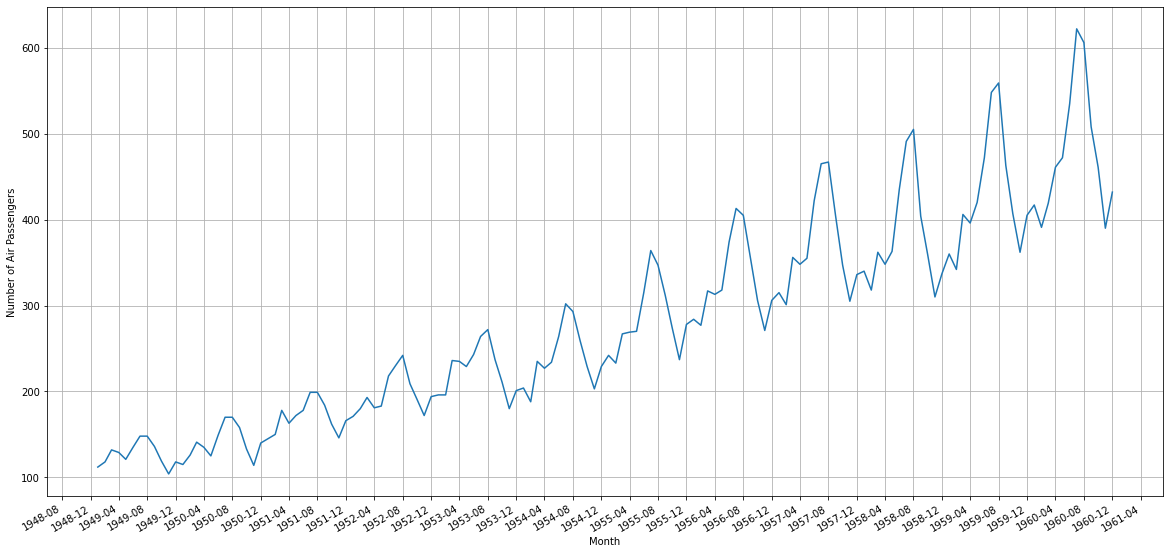

In [26]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plty
 
fig, ax = plty.subplots(figsize=(20,10))
plty.xlabel("Month")
plty.ylabel("Number of Air Passengers")
 
half_year_locator = mdates.MonthLocator(interval = 4)
year_month_formatter = mdates.DateFormatter('%Y-%m')
 
ax.xaxis.set_major_locator(half_year_locator)
ax.xaxis.set_major_formatter(year_month_formatter)
 
ax.plot(data)
fig.autofmt_xdate()
plty.grid()
plty.show()


In [28]:
# Seasonal plot 
 
data2 = data.reset_index()
data2['year'] = pd.DatetimeIndex(data2['Month']).year
data2['month'] = pd.DatetimeIndex(data2['Month']).month
 
# parameter hue digunakan untuk menampilkan multiple line chart berdasarkan tahun ('year')
sns.relplot (kind = 'line', data = data2, x = 'month', y = '#Passengers', hue = 'year', aspect = 2, marker='o' )


NameError: ignored

In [29]:
# rolling dengan interval window sebesar 12 bulan dan hitung rata-rata
rolmean=data.rolling(window=12).mean()  
 
# rolling dengan interval window sebesar 12 bulan dan hitung st. deviasi
rolstd=data.rolling(window=12).std() 
 
# Tampilkan 15 baris pertama dari hasil rolling mean
print('15 baris pertama rolling mean: ')
print(rolmean.head(15))                
print ('')
 
# Tampilkan 15 baris pertama dari hasil rolling st. deviasi
print('15 baris pertama std. deviasi: ')
print(rolstd.head(15))

15 baris pertama rolling mean: 
            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
1949-06-01          NaN
1949-07-01          NaN
1949-08-01          NaN
1949-09-01          NaN
1949-10-01          NaN
1949-11-01          NaN
1949-12-01   126.666667
1950-01-01   126.916667
1950-02-01   127.583333
1950-03-01   128.333333

15 baris pertama std. deviasi: 
            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
1949-06-01          NaN
1949-07-01          NaN
1949-08-01          NaN
1949-09-01          NaN
1949-10-01          NaN
1949-11-01          NaN
1949-12-01    13.720147
1950-01-01    13.453342
1950-02-01    13.166475
1950-03-01    13.686977


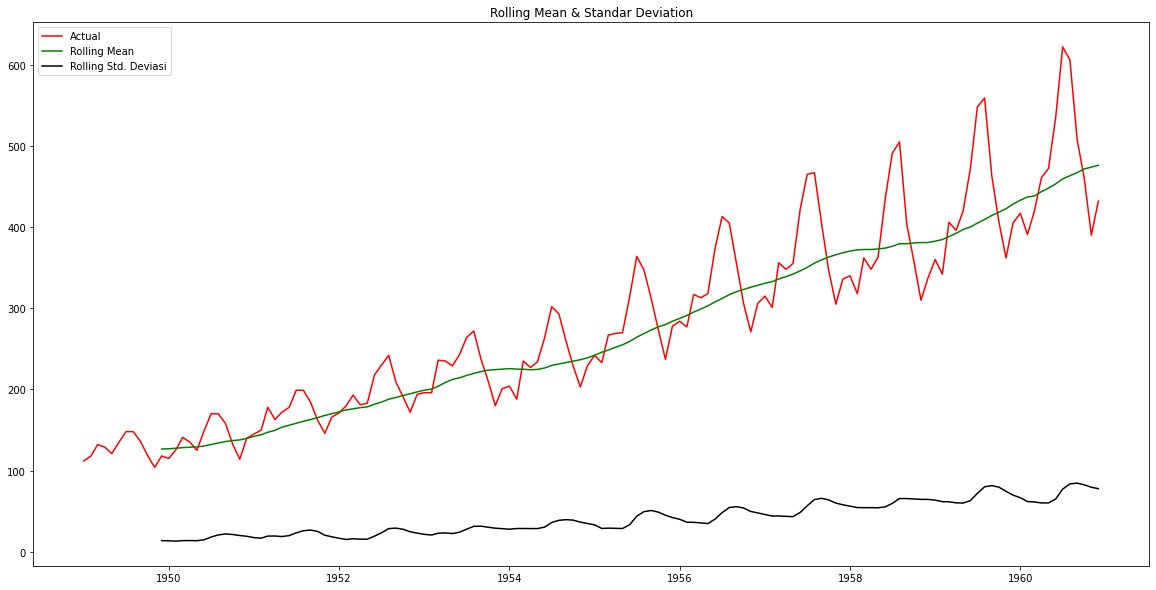

In [30]:
# atur ukuran chart 
plt.figure(figsize=(20,10))
 
# buat multiple line chart berdasarkan warna dan label 
actual=plt.plot(data, color='red', label='Actual')
mean_6=plt.plot(rolmean, color='green', label='Rolling Mean')
std_6=plt.plot(rolstd, color='black', label='Rolling Std. Deviasi')
 
# judul chart 
 
plt.legend(loc='best')
plt.title('Rolling Mean & Standar Deviation')
plt.show(block=False)


In [31]:
from statsmodels.tsa.stattools import adfuller
print('Dickey-Fuller Test: ')
dftest=adfuller(data['#Passengers'], autolag='AIC')
dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Dickey-Fuller Test: 
Test Statistic            0.815369
p-value                   0.991880
Lags Used                13.000000
No. of Obs              130.000000
Critical Value (1%)      -3.481682
Critical Value (5%)      -2.884042
Critical Value (10%)     -2.578770
dtype: float64


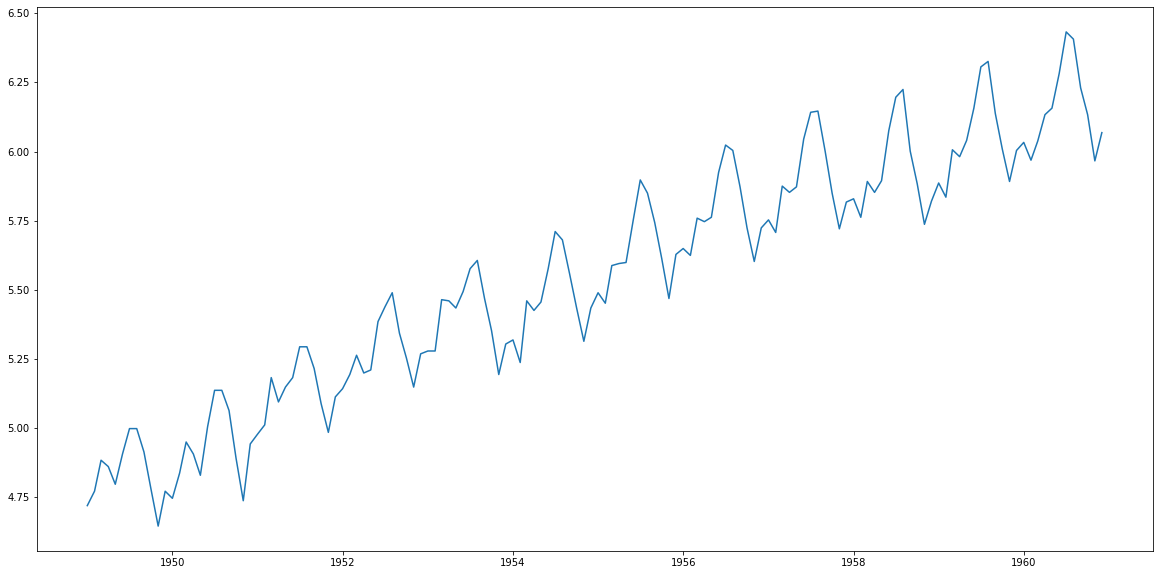

In [34]:
plt.figure(figsize=(20,10))
data_log=np.log(data) #kita melakukan log analysis untuk men stabilkan variance dari sebuah series. 
plt.plot(data_log)


In [33]:

# Cek secara visual kembali dengan plot data_log dengan rolling window mean dan std. deviation
plt.figure(figsize=(20,10))
 
MAvg=data_log.rolling(window=12).mean() 
MStd=data_log.rolling(window=12).std()
 
plt.plot(data_log)
plt.plot(MAvg, color='blue')
#plt.plot(MStd, color='red')


NameError: ignored

<Figure size 1440x720 with 0 Axes>